In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn import tree
import pydot


In [4]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
filmes = pd.read_csv('data.csv', delimiter = ',')
filmes.rename(columns={"Nome": "nome", "Classificação(Anderson)": "nota","Tipo": "tipo", "Categoria": "categoria"}, inplace=True)
filmes.drop(['Orçamento', 'Diretor', 'nome'], axis=1, inplace=True)







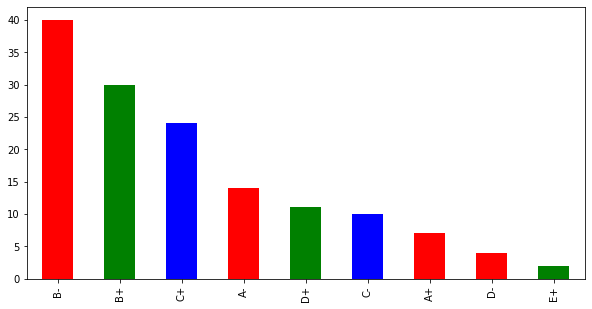

In [5]:
filmes['nota'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'])
plt.show()

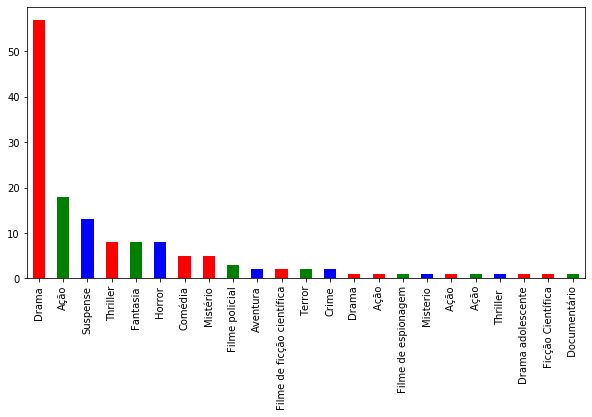

In [6]:
filmes['categoria'].value_counts().plot(kind='bar', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'])
plt.show()

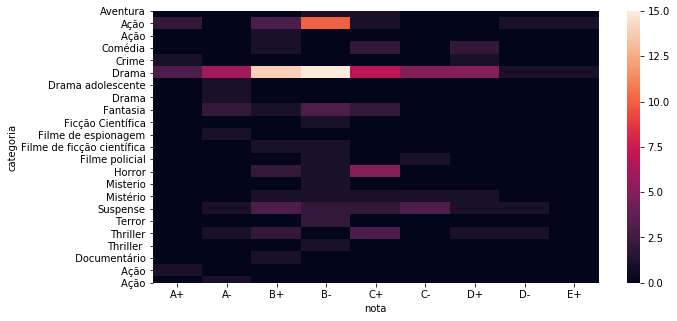

In [8]:
filmes.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(pd.crosstab(filmes.categoria, filmes.nota))

In [9]:

X = pd.get_dummies(filmes, prefix=['tipo', 'categoria'], columns=['tipo', 'categoria'])

del X['nota']

Y = pd.get_dummies(filmes, prefix=['nota'], columns=['nota'])
Y.drop(['categoria', 'tipo'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.80, random_state=1)


In [19]:
from IPython import display
import pydot

from sklearn.externals.six import StringIO 

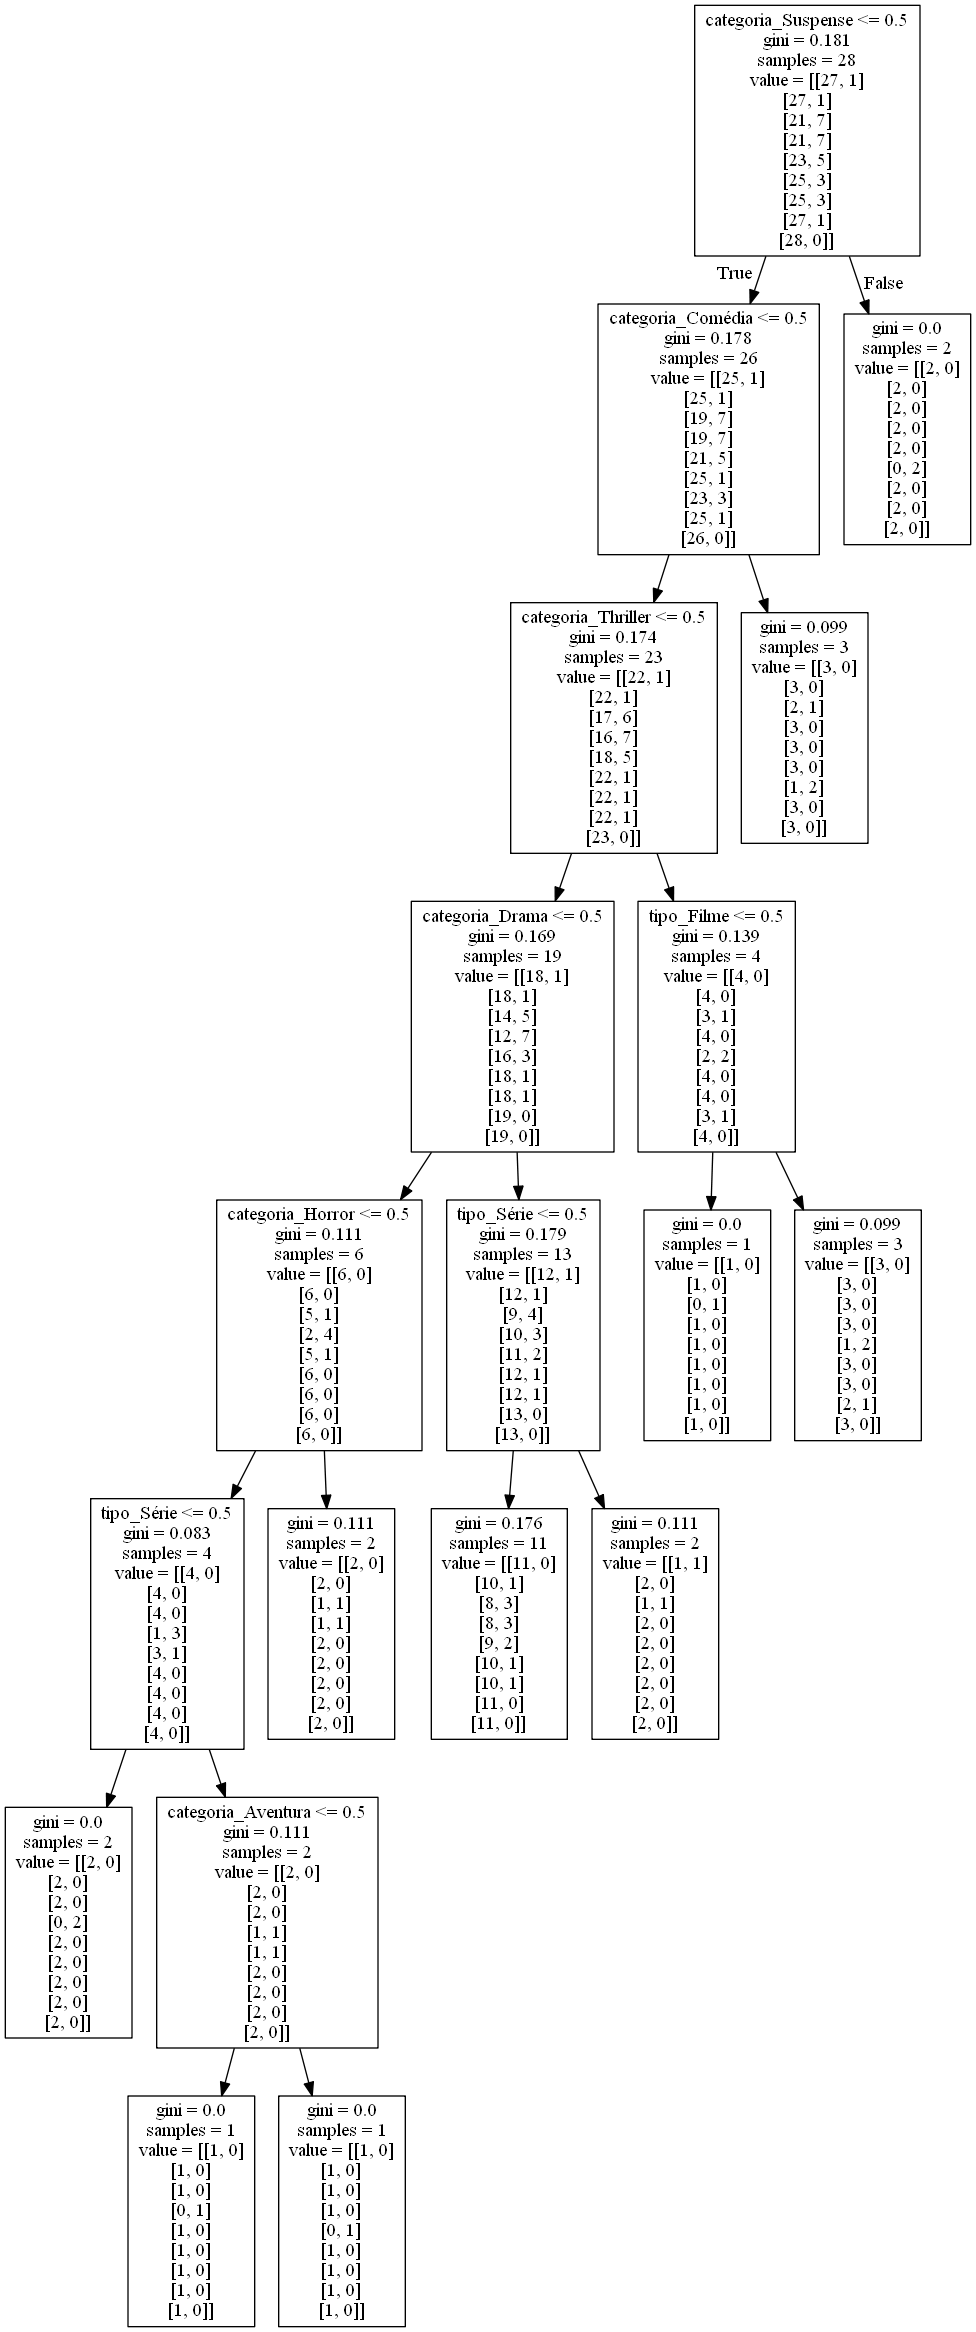

In [29]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
dt_feature_names = list(X.columns)

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,feature_names=dt_feature_names)
dot_data.getvalue()

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())


display.Image(graph.create_png())